# Summary

1)  load data

2)  PCA does not look necessary

3) Logistic regressions (assumptions not really met)

4) XGBoost 

In [33]:
!pip uninstall matplotlib

^C


# Feature importance analysis

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(threshold=30)

AttributeError: module 'matplotlib' has no attribute 'rcParams'

In [11]:
df = pd.read_csv(r'DataProcessing\\new_final_df.csv')
df = df.iloc[:,5:]
df.drop(columns = ['time','picture','birthplace','deathplace','birthdate','deathdate','parent','rating'], inplace=True)
df = df[[col for col in df.columns if not col.startswith(('Movement', 'Education', 'Specialty'))]].select_dtypes(include=['number', 'bool'])
df = df[(df.notna().all(axis=1))]  # Remove all censored images
df.head()

C:\Users\herre\AppData\Local\Temp\ipykernel_15192\1824527765.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'DataProcessing\\new_final_df.csv')


,AI_Generated,logit,edge_score,contrast_score,brightness_score,saturation_score,num_rels,classification,accuracy_prediction
0,0,-8.378802,46.383220,55.552072,112.148305,127.663731,1,0,1
1,0,-14.644643,47.354136,54.624181,124.601402,62.417748,1,0,1
2,0,-4.634872,28.550276,48.946494,103.395141,80.945548,5,1,0
3,0,-10.061778,67.087002,52.743048,166.384401,80.268604,0,0,1
4,0,-5.156153,58.546688,54.431662,87.995360,159.627900,0,1,0


## PCA

Imo, if we work with this small amount of components, it is not necessary.

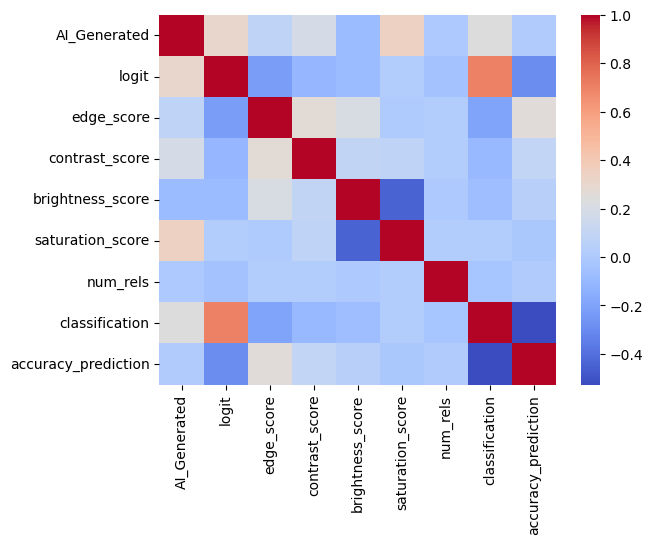

In [130]:
# Generate a correlation matrix
corr_matrix = df.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

# Show the plot
plt.show()

In [131]:
na_counts = df.isna().sum()

# Print the resulting series of NaN counts
print(na_counts)

AI_Generated           0
logit                  0
edge_score             0
contrast_score         0
brightness_score       0
saturation_score       0
num_rels               0
classification         0
accuracy_prediction    0
dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract the numerical features from your dataset
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
X = df[num_cols]
X.drop(columns=['AI_Generated','classification','accuracy_prediction'], inplace=True)

# Fit a PCA model on your dataset
pca = PCA().fit(X)

# Plot the scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'o-')
plt.xlabel('Number of components')
plt.ylabel('Proportion of variance explained')
plt.title('Scree plot')
plt.show()


ModuleNotFoundError: No module named 'matplotlib.colorbar'

# Logistic regression on AI_Generated

In [35]:
df = pd.read_csv(r'DataProcessing\\new_final_df.csv')
df = df.iloc[:,5:]
df.drop(columns = ['time','picture','birthplace','deathplace','birthdate','deathdate','parent','rating'], inplace=True)
df = df[[col for col in df.columns if not col.startswith(('Movement', 'Education', 'Specialty'))]].select_dtypes(include=['number', 'bool'])
df = df[(df.notna().all(axis=1))]  # Remove all censored images
df.head()

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score


# Extract the feature columns and target column
X = df.drop(['AI_Generated','classification','accuracy_prediction'], axis=1)
y = df['AI_Generated']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit a logistic regression model using statsmodels
logit_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

# Predict the class probabilities for the test set
y_pred_probs = logit_model.predict(sm.add_constant(X_test))

# Convert class probabilities to binary predictions
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the summary of the model
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.380891
         Iterations 7
Accuracy: 0.8257686676427526
                           Logit Regression Results                           
Dep. Variable:           AI_Generated   No. Observations:                10928
Model:                          Logit   Df Residuals:                    10921
Method:                           MLE   Df Model:                            6
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:                  0.2958
Time:                        23:16:18   Log-Likelihood:                -4162.4
converged:                       True   LL-Null:                       -5910.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.5378      0.205    -27.029      0.000      -

C:\Users\herre\AppData\Local\Temp\ipykernel_15192\3487601676.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'DataProcessing\\new_final_df.csv')


In [37]:
# Assumptions

result = logit_model 

# Check assumptions
fitted_values = result.fittedvalues
residuals = result.resid_response
'''
# Linearity
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Independence
for column in X_train.columns:
    plt.scatter(X_train[column], residuals)
    plt.xlabel(column)
    plt.ylabel('Residuals')
    plt.show()

# Homoscedasticity
plt.scatter(fitted_values, abs(residuals))
plt.xlabel('Fitted Values')
plt.ylabel('Absolute Residuals')
plt.show()
'''
# Multicollinearity: Compute VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)


   VIF Factor          features
0    4.459927             logit
1    4.497672        edge_score
2   14.162176    contrast_score
3    8.380730  brightness_score
4    5.568677  saturation_score
5    1.401360          num_rels


# Logistic regression on accuracy_prediction

In [34]:
df = pd.read_csv(r'DataProcessing\\new_final_df.csv')
df = df.iloc[:,5:]
df.drop(columns = ['time','picture','birthplace','deathplace','birthdate','deathdate','parent','rating'], inplace=True)
df = df[[col for col in df.columns if not col.startswith(('Movement', 'Education', 'Specialty'))]].select_dtypes(include=['number', 'bool'])
df = df[(df.notna().all(axis=1))]  # Remove all censored images
df.head()

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score


# Extract the feature columns and target column
X = df.drop(['AI_Generated','classification','accuracy_prediction','logit'], axis=1)
y = df['accuracy_prediction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit a logistic regression model using statsmodels
logit_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

# Predict the class probabilities for the test set
y_pred_probs = logit_model.predict(sm.add_constant(X_test))

# Convert class probabilities to binary predictions
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the summary of the model
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.615133
         Iterations 5
Accuracy: 0.6595900439238653
                            Logit Regression Results                           
Dep. Variable:     accuracy_prediction   No. Observations:                10928
Model:                           Logit   Df Residuals:                    10922
Method:                            MLE   Df Model:                            5
Date:                 Wed, 22 Feb 2023   Pseudo R-squ.:                 0.06157
Time:                         23:15:51   Log-Likelihood:                -6722.2
converged:                        True   LL-Null:                       -7163.2
Covariance Type:             nonrobust   LLR p-value:                2.015e-188
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2867      0.126     -2.272      0.02

C:\Users\herre\AppData\Local\Temp\ipykernel_15192\2117977965.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'DataProcessing\\new_final_df.csv')


In [ ]:
# Assumptions
result = logit_model

# Check assumptions
fitted_values = result.fittedvalues
residuals = result.resid_response

# Linearity
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Independence
for column in X_train.columns:
    plt.scatter(X_train[column], residuals)
    plt.xlabel(column)
    plt.ylabel('Residuals')
    plt.show()

# Homoscedasticity
plt.scatter(fitted_values, abs(residuals))
plt.xlabel('Fitted Values')
plt.ylabel('Absolute Residuals')
plt.show()

# Multicollinearity: Compute VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

# XGBoost on AI_Generated

In [27]:
df = pd.read_csv(r'DataProcessing\\new_final_df.csv')
df = df.iloc[:,5:]
df = df.loc[:, ~df.columns.str.endswith('x')]
df.drop(columns = ['time','picture','birthplace','deathplace','birthdate','deathdate','parent','rating'], inplace=True)
df = df[[col for col in df.columns if not col.startswith(('Movement', 'Education', 'Specialty'))]].select_dtypes(include=['number', 'bool'])
df = df[(df.notna().all(axis=1))]  # Remove all censored images
df.head()

C:\Users\herre\AppData\Local\Temp\ipykernel_15192\824078045.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'DataProcessing\\new_final_df.csv')


,AI_Generated,logit,edge_score,contrast_score,brightness_score,saturation_score,num_rels,classification,accuracy_prediction
0,0,-8.378802,46.383220,55.552072,112.148305,127.663731,1,0,1
1,0,-14.644643,47.354136,54.624181,124.601402,62.417748,1,0,1
2,0,-4.634872,28.550276,48.946494,103.395141,80.945548,5,1,0
3,0,-10.061778,67.087002,52.743048,166.384401,80.268604,0,0,1
4,0,-5.156153,58.546688,54.431662,87.995360,159.627900,0,1,0


In [28]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extract the feature columns and target column
X = df.drop(['AI_Generated','classification','accuracy_prediction'], axis=1)
y = df['AI_Generated']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on testing set
y_pred = model.predict(X_test)

# Evaluate accuracy of model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

# Extract feature importances and store them in a pandas dataframe
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)

print(importance)


Accuracy: 87.85%
            Feature  Importance
0             logit    0.261889
4  saturation_score    0.211471
3  brightness_score    0.189109
1        edge_score    0.188655
2    contrast_score    0.096438
5          num_rels    0.052438


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Define XGBoost model
model = xgb.XGBClassifier()

# Perform 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

# Calculate mean and standard deviation of accuracy scores
mean_score = scores.mean()
std_score = scores.std()
print('Accuracy: %.2f%% (+/- %.2f%%)' % (mean_score * 100.0, std_score * 100.0))

Accuracy: 87.34% (+/- 0.49%)


# XGBoost on accuracy_prediction

In [30]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extract the feature columns and target column
X = df.drop(['AI_Generated','classification','accuracy_prediction','logit'], axis=1)
y = df['accuracy_prediction']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on testing set
y_pred = model.predict(X_test)

# Evaluate accuracy of model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

# Extract feature importances and store them in a pandas dataframe
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)

print(importance)


Accuracy: 64.31%
            Feature  Importance
0        edge_score    0.302452
3  saturation_score    0.194708
1    contrast_score    0.178093
2  brightness_score    0.175142
4          num_rels    0.149605


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Define XGBoost model
model = xgb.XGBClassifier()

# Perform 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

# Calculate mean and standard deviation of accuracy scores
mean_score = scores.mean()
std_score = scores.std()
print('Accuracy: %.2f%% (+/- %.2f%%)' % (mean_score * 100.0, std_score * 100.0))

Accuracy: 64.90% (+/- 0.58%)
